<a href="https://colab.research.google.com/github/sattviksahai/CS583B_Recitation/blob/master/dogsCatsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!tar -xf 'drive/My Drive/dogsCats.tar.xz'
!tar -xf train.tar.xz
!tar -xf test1.tar.xz
!ls

drive	     sampleSubmission.csv  test1.tar.xz  train.tar.xz
sample_data  test1		   train


In [0]:
train_dir = './train'
test_dir = './test1'

In [7]:
from keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2, )
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
# This is the target directory
train_dir,
# All images will be resized to 150x150
target_size=(150, 150),
batch_size=20,
# Since we use binary_crossentropy loss, we need binary labels
class_mode='binary',
# training subset
subset='training')

Found 20000 images belonging to 2 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
# This is the target directory
train_dir,
# All images will be resized to 150x150
target_size=(150, 150),
batch_size=20,
# Since we use binary_crossentropy loss, we need binary labels
class_mode='binary',
# training subset
subset='validation')

Found 5000 images belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
history = model.fit_generator(
    train_generator,  
    epochs=10, 
    validation_data=validation_generator, 
    validation_steps=10)




Epoch 1/10





1000/1000 [==============================] - 82s 82ms/step - loss: 0.5840 - acc: 0.6797 - val_loss: 0.4653 - val_acc: 0.7800
Epoch 2/10
1000/1000 [==============================] - 67s 67ms/step - loss: 0.4733 - acc: 0.7741 - val_loss: 0.4452 - val_acc: 0.8100
Epoch 3/10
1000/1000 [==============================] - 71s 71ms/step - loss: 0.4194 - acc: 0.8085 - val_loss: 0.3867 - val_acc: 0.8400
Epoch 4/10
1000/1000 [==============================] - 71s 71ms/step - loss: 0.3816 - acc: 0.8286 - val_loss: 0.3948 - val_acc: 0.8250
Epoch 5/10
1000/1000 [==============================] - 68s 68ms/step - loss: 0.3430 - acc: 0.8479 - val_loss: 0.3727 - val_acc: 0.8450
Epoch 6/10
1000/1000 [==============================] - 68s 68ms/step - loss: 0.3128 - acc: 0.8644 - val_loss: 0.3321 - val_acc: 0.8450
Epoch 7/10
1000/1000 [==============================] - 69s 69ms/step - loss: 0.2794 - acc: 0.8819 - val_loss: 0.3716 - val_acc: 0.8500
Epoch 8/10
1000/1000 [==================

[0.6796500000655651, 0.7740500018596649, 0.8084500015974044, 0.828550000667572, 0.8479000008106232, 0.8644499981403351, 0.8818999964594841, 0.8944999957084656, 0.9078999944925308, 0.9208499937653541]


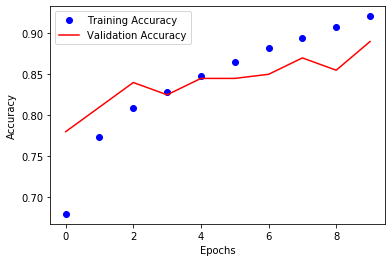

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = range(10) # 50 is the number of epochs
train_acc = history.history['acc']
valid_acc = history.history['val_acc']
print(train_acc)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, valid_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()